# Cropping Models

https://github.com/shaoanlu/GazeML-keras

In [1]:
import pandas as pd
import os
import io 
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [1]:
!pip3 install opencv-python

     |████████████████████████████████| 50.4 MB 355 kB/s eta 0:00:013     |████████████████▎               | 25.7 MB 10.0 MB/s eta 0:00:03     |███████████████████▌            | 30.8 MB 6.3 MB/s eta 0:00:04     |███████████████████████████████ | 49.0 MB 8.6 MB/s eta 0:00:01


In [4]:
!pip3 install tensorflow

     |████████████████████████████████| 394.4 MB 42 kB/s s eta 0:00:01  |                                | 768 kB 3.4 MB/s eta 0:01:57     |███▊                            | 46.2 MB 6.5 MB/s eta 0:00:54     |████▎                           | 53.4 MB 6.5 MB/s eta 0:00:53     |█████▋                          | 69.4 MB 7.5 MB/s eta 0:00:44     |█████▉                          | 71.7 MB 7.5 MB/s eta 0:00:44     |█████████▌                      | 117.1 MB 12.5 MB/s eta 0:00:23     |███████████                     | 134.3 MB 13.0 MB/s eta 0:00:21     |█████████████                   | 159.1 MB 6.9 MB/s eta 0:00:34     |██████████████▌                 | 178.5 MB 12.3 MB/s eta 0:00:18     |████████████████                | 198.1 MB 8.5 MB/s eta 0:00:24     |██████████████████▏             | 223.4 MB 8.3 MB/s eta 0:00:21     |██████████████████▎             | 225.9 MB 8.3 MB/s eta 0:00:21     |█████████████████████████       | 307.9 MB 9.9 MB/s eta 0:00:09     |████████████████████████████▊   |

In [6]:
!pip3 install keras

In [2]:
from detector.face_detector import MTCNNFaceDetector
import tensorflow as tf
#from keras import backend as K

<function Network.conv at 0x7f3f8dd79280>
<function Network.prelu at 0x7f3f8dd79550>
<function Network.max_pool at 0x7f3f8dd793a0>
<function Network.fc at 0x7f3f8dd79790>
<function Network.softmax at 0x7f3f8dd799d0>


In [3]:
mtcnn_weights_dir = "./"
fd = MTCNNFaceDetector(sess=tf.compat.v1.keras.backend.get_session(), model_path=mtcnn_weights_dir)

Tensor("input:0", shape=(None, None, None, 3), dtype=float32) --input conv
Tensor("conv1/BiasAdd:0", shape=(None, None, None, 10), dtype=float32) ---out conv
{'data': <tf.Tensor 'input:0' shape=(None, None, None, 3) dtype=float32>, 'conv1': <tf.Tensor 'conv1/BiasAdd:0' shape=(None, None, None, 10) dtype=float32>} --after
----layer_decorated----
Tensor("conv1/BiasAdd:0", shape=(None, None, None, 10), dtype=float32) ---input prelu
Tensor("PReLU1/add:0", shape=(None, None, None, 10), dtype=float32) ---out prelu
{'data': <tf.Tensor 'input:0' shape=(None, None, None, 3) dtype=float32>, 'conv1': <tf.Tensor 'conv1/BiasAdd:0' shape=(None, None, None, 10) dtype=float32>, 'PReLU1': <tf.Tensor 'PReLU1/add:0' shape=(None, None, None, 10) dtype=float32>} --after
----layer_decorated----
Tensor("PReLU1/add:0", shape=(None, None, None, 10), dtype=float32) ---input maxpool
Tensor("pool1:0", shape=(None, None, None, 10), dtype=float32) ---out maxpool
{'data': <tf.Tensor 'input:0' shape=(None, None, None

Tensor("rnet/conv2/BiasAdd:0", shape=(None, 9, 9, 48), dtype=float32) ---out conv
{'data': <tf.Tensor 'rnet/input:0' shape=(None, 24, 24, 3) dtype=float32>, 'conv1': <tf.Tensor 'rnet/conv1/BiasAdd:0' shape=(None, 22, 22, 28) dtype=float32>, 'prelu1': <tf.Tensor 'rnet/prelu1/add:0' shape=(None, 22, 22, 28) dtype=float32>, 'pool1': <tf.Tensor 'rnet/pool1:0' shape=(None, 11, 11, 28) dtype=float32>, 'conv2': <tf.Tensor 'rnet/conv2/BiasAdd:0' shape=(None, 9, 9, 48) dtype=float32>} --after
----layer_decorated----
Tensor("rnet/conv2/BiasAdd:0", shape=(None, 9, 9, 48), dtype=float32) ---input prelu
Tensor("rnet/prelu2/add:0", shape=(None, 9, 9, 48), dtype=float32) ---out prelu
{'data': <tf.Tensor 'rnet/input:0' shape=(None, 24, 24, 3) dtype=float32>, 'conv1': <tf.Tensor 'rnet/conv1/BiasAdd:0' shape=(None, 22, 22, 28) dtype=float32>, 'prelu1': <tf.Tensor 'rnet/prelu1/add:0' shape=(None, 22, 22, 28) dtype=float32>, 'pool1': <tf.Tensor 'rnet/pool1:0' shape=(None, 11, 11, 28) dtype=float32>, 'conv

Tensor("onet/input:0", shape=(None, 48, 48, 3), dtype=float32) --input conv
Tensor("onet/conv1/BiasAdd:0", shape=(None, 46, 46, 32), dtype=float32) ---out conv
{'data': <tf.Tensor 'onet/input:0' shape=(None, 48, 48, 3) dtype=float32>, 'conv1': <tf.Tensor 'onet/conv1/BiasAdd:0' shape=(None, 46, 46, 32) dtype=float32>} --after
----layer_decorated----
Tensor("onet/conv1/BiasAdd:0", shape=(None, 46, 46, 32), dtype=float32) ---input prelu
Tensor("onet/prelu1/add:0", shape=(None, 46, 46, 32), dtype=float32) ---out prelu
{'data': <tf.Tensor 'onet/input:0' shape=(None, 48, 48, 3) dtype=float32>, 'conv1': <tf.Tensor 'onet/conv1/BiasAdd:0' shape=(None, 46, 46, 32) dtype=float32>, 'prelu1': <tf.Tensor 'onet/prelu1/add:0' shape=(None, 46, 46, 32) dtype=float32>} --after
----layer_decorated----
Tensor("onet/prelu1/add:0", shape=(None, 46, 46, 32), dtype=float32) ---input maxpool
Tensor("onet/pool1:0", shape=(None, 23, 23, 32), dtype=float32) ---out maxpool
{'data': <tf.Tensor 'onet/input:0' shape=(

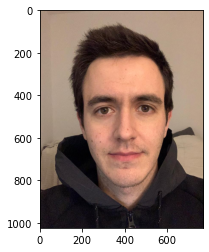

In [4]:
img_path = "rob.jpeg"
input_img = cv2.imread(img_path)[..., ::-1]
plt.imshow(input_img)

In [5]:
face, lms = fd.detect_face(input_img) # assuming there is only one face in input image
assert len(face) >= 1, "No face detected"

In [6]:
left_eye_im, right_eye_im = fd.cropImage(input_img,lms)

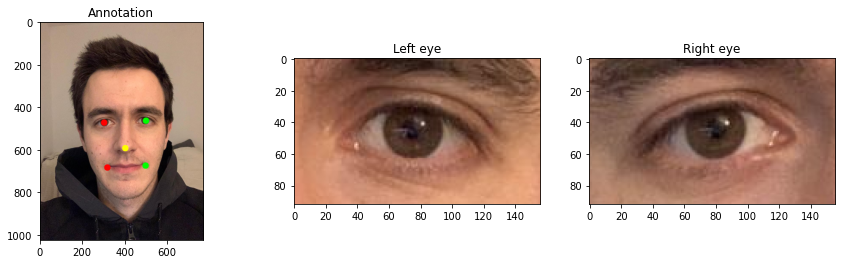

In [7]:
left_eye_xy = np.array([lms[6], lms[1]])
right_eye_xy = np.array([lms[5], lms[0]])
nouse = np.array([lms[7], lms[2]])
right_mouth=np.array([lms[8], lms[3]])
left_mouth=np.array([lms[9], lms[4]])

dist_eyes = np.linalg.norm(left_eye_xy - right_eye_xy)
eye_bbox_w = (dist_eyes / 1.25)
eye_bbox_h = (eye_bbox_w *0.6)

plt.figure(figsize=(15,4))
draw = input_img.copy()
for i, lm in enumerate([left_eye_xy, right_eye_xy]):
    draw = cv2.circle(draw, (int(lm[1]), int(lm[0])), 15, (255*i,255*(1-i),0), -1)
draw = cv2.circle(draw, (int(nouse[1]), int(nouse[0])), 15, (255,255*(1-0),0), -1)
for i, lm in enumerate([left_mouth, right_mouth]):
    draw = cv2.circle(draw, (int(lm[1]), int(lm[0])), 15, (255*i,255*(1-i),0), -1)

plt.subplot(1,3,1)
plt.title('Annotation')
plt.imshow(draw)
plt.subplot(1,3,2)
plt.title('Left eye')
plt.imshow(left_eye_im)
plt.subplot(1,3,3)
plt.title('Right eye')
plt.imshow(right_eye_im)

In [11]:
from models.elg_keras import KerasELG
model = KerasELG()
model.net.load_weights("./elg_weights/elg_keras.h5")

In [12]:
inp_left = cv2.cvtColor(left_eye_im, cv2.COLOR_RGB2GRAY)
inp_left = cv2.equalizeHist(inp_left)
inp_left = cv2.resize(inp_left, (180,108))[np.newaxis, ..., np.newaxis]

inp_right = cv2.cvtColor(right_eye_im, cv2.COLOR_RGB2GRAY)
inp_right = cv2.equalizeHist(inp_right)
inp_right = cv2.resize(inp_right, (180,108))[np.newaxis, ..., np.newaxis]

In [13]:
input_array = np.concatenate([inp_left, inp_right], axis=0)
pred_left, pred_right = model.net.predict(input_array/255 * 2 - 1)

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [14]:
def draw_pupil(im, inp_im, lms):
    draw = im.copy()
    #print(draw.shape)
    draw = cv2.resize(draw, (inp_im.shape[2], inp_im.shape[1]))
    stroke = inp_im.shape[1] // 30
    for i, lm in enumerate(np.squeeze(lms)):

        x, y = int(lm[0]*3), int(lm[1]*3)
        if i < 8:
            draw = cv2.circle(draw, (x, y), stroke, (125,255,125), -1)
        elif 8 <= i < 16:
            draw = cv2.circle(draw, (x, y), stroke, (125,125,255), -1)         

    return draw

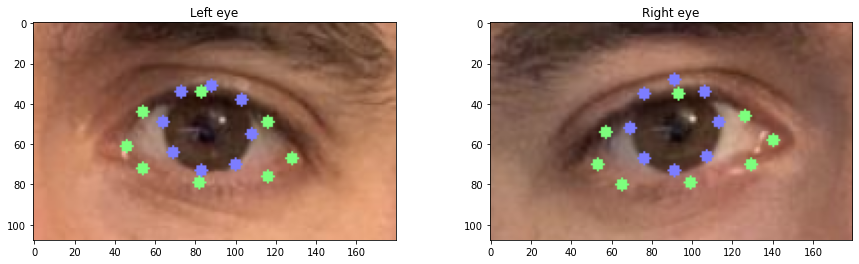

In [15]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Left eye")
lms_left = model._calculate_landmarks(pred_left)
result_left = draw_pupil(left_eye_im, inp_left, lms_left)
plt.imshow(result_left)
plt.subplot(1,2,2)
plt.title("Right eye")
lms_right = model._calculate_landmarks(pred_right)
result_right = draw_pupil(right_eye_im, inp_right, lms_right)
plt.imshow(result_right)

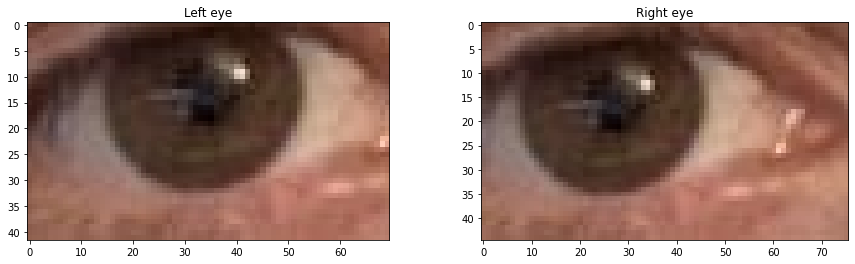

In [16]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Left eye")
cropped_left= right_eye_im[int(lms_left[0][10][1] * 3):int(lms_left[0][14][1] * 3),
                int(lms_left[0][0][0] * 3):int(lms_left[0][5][0] * 3)]
plt.imshow(cropped_left)

plt.subplot(1,2,2)
plt.title("Right eye")
cropped_right= right_eye_im[int(lms_right[0][10][1] * 3):int(lms_right[0][14][1] * 3),
                int(lms_right[0][0][0] * 3):int(lms_right[0][5][0] * 3)]
plt.imshow(cropped_right)